Regression:

In [194]:
import torch
import matplotlib.pyplot as plt

In [195]:
n = 20

In [196]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [197]:
y = 2*x + 3 + torch.normal(mean=torch.zeros(8), std=0.2)
y

tensor([ 3.0247,  5.1523,  6.6155,  9.0565, 11.0676, 13.0038, 14.8972, 16.8702])

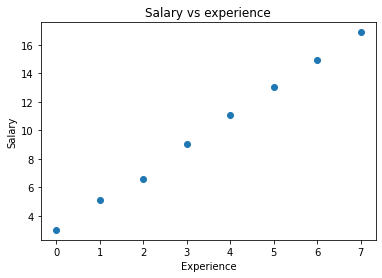

In [198]:
fig, ax = plt.subplots()
plt.title("Salary vs experience")
plt.xlabel("Experience")
plt.ylabel("Salary")
_ = ax.scatter(x, y)

In [199]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [200]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

In [201]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [202]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [203]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

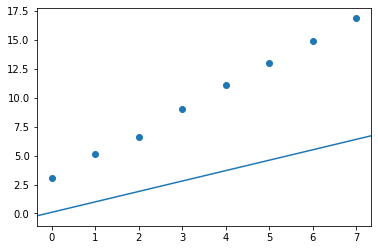

In [204]:
regression_plot(x, y, m, b)

In [205]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [206]:
C = mse(regression(x, m, b), y)
C

tensor(51.2516, grad_fn=<DivBackward0>)

Calculate how the cost varies respect to m and b

In [207]:
C.backward() 

In [208]:
m.grad

tensor([-58.3792])

In [209]:
b.grad

tensor([-13.4219])

Gradient descent (optimization)

In [210]:
optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer.step()

Confirm parameter optimization:

In [211]:
m

tensor([1.4838], requires_grad=True)

In [212]:
b

tensor([0.2342], requires_grad=True)

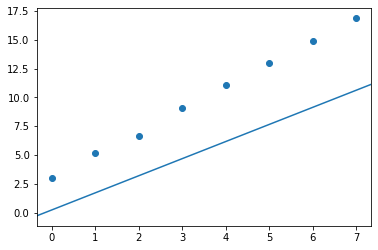

In [213]:
regression_plot(x, y, m, b)

In [214]:
#C = mse(regression(x, m, b), y)
C

tensor(51.2516, grad_fn=<DivBackward0>)

In [215]:
epochs = 10000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 21.9, m grad -37, b grad -9.07
Epoch 1, cost 10, m grad -23.4, b grad -6.3
Epoch 2, cost 5.21, m grad -14.8, b grad -4.53
Epoch 3, cost 3.25, m grad -9.29, b grad -3.4
Epoch 4, cost 2.44, m grad -5.8, b grad -2.69
Epoch 5, cost 2.11, m grad -3.58, b grad -2.23
Epoch 6, cost 1.96, m grad -2.17, b grad -1.93
Epoch 7, cost 1.88, m grad -1.28, b grad -1.74
Epoch 8, cost 1.84, m grad -0.708, b grad -1.62
Epoch 9, cost 1.81, m grad -0.347, b grad -1.53
Epoch 10, cost 1.79, m grad -0.118, b grad -1.48
Epoch 11, cost 1.77, m grad 0.0266, b grad -1.44
Epoch 12, cost 1.75, m grad 0.118, b grad -1.41
Epoch 13, cost 1.73, m grad 0.176, b grad -1.39
Epoch 14, cost 1.71, m grad 0.212, b grad -1.38
Epoch 15, cost 1.69, m grad 0.234, b grad -1.37
Epoch 16, cost 1.67, m grad 0.248, b grad -1.35
Epoch 17, cost 1.65, m grad 0.256, b grad -1.35
Epoch 18, cost 1.63, m grad 0.261, b grad -1.34
Epoch 19, cost 1.61, m grad 0.263, b grad -1.33
Epoch 20, cost 1.59, m grad 0.264, b grad -1.32
Epoch

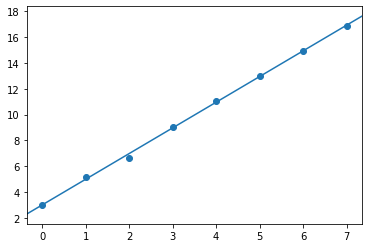

In [216]:
regression_plot(x, y, m, b)

In [217]:
m.item()

1.985941767692566

In [218]:
b.item()

3.0101726055145264